In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
assessment_df = pd.read_csv(r"Sparx Learning_task_data/task_data/task_qla_df.csv")
homework_df = pd.read_feather(r"Sparx Learning_task_data/task_data/task_tia_df.feather")

## Exploratory Data Analysis

In [3]:
print("assessment_df shape: " + str(assessment_df.shape))
print("homework_df shape: " + str(homework_df.shape))

assessment_df shape: (5827, 11)
homework_df shape: (459115, 14)


In [4]:
display(assessment_df.head())

,student_id,assessment_id,assessment_name,n_questions_entered,n_questions_attempted,n_assessment_questions,absent,mark,available_marks,created,last_updated
0,b61c4,94245,Year 7 Term 3 Assessment,36,36,36,False,34.0,60,2024-06-27 14:18:23.948111+00:00,2024-06-27 14:22:34.230140+00:00
1,d47b3,94245,Year 7 Term 3 Assessment,36,36,36,False,37.0,60,2024-07-08 13:52:46.036772+00:00,2024-07-08 14:24:42.552651+00:00
2,01093,94245,Year 7 Term 3 Assessment,36,36,36,False,42.0,60,2024-07-03 08:08:21.592102+00:00,2024-07-03 08:22:59.515326+00:00
3,2a270,94245,Year 7 Term 3 Assessment,36,36,36,False,27.0,60,2024-07-04 07:52:38.344720+00:00,2024-07-04 08:21:34.395024+00:00
4,24de5,94245,Year 7 Term 3 Assessment,36,36,36,False,37.0,60,2024-07-13 18:57:19.360425+00:00,2024-07-13 19:30:58.809699+00:00


In [5]:
display(homework_df.head())

,index,student_id,package_id,first_start_time,last_start_time,task_index,task_item_index,assigned_number_homeworks_ago,learning_unit_id,question_id,n_times_prior_correct,summary,time_to_first_correct,video_time
0,1100672,f6105,081b0,2025-04-06 21:08:53.567000+00:00,2025-04-06 21:09:55.161000+00:00,1,3,0,ecbb8,55587,0,WWC,64.619,0.0
1,4786,f6105,efdbe,2024-06-02 16:50:04.338000+00:00,2024-06-14 16:27:20.083000+00:00,3,3,0,48303,7477a,0,AA,NaN,0.0
2,340068,f6105,b8685,2025-03-09 17:03:30.877000+00:00,2025-03-09 17:06:44.174000+00:00,1,4,0,4a12e,0a175,0,AWC,91.804,0.0
3,135582,f6105,431d6,NaT,NaT,5,5,10,d26a1,af8ef,0,None,NaN,NaN
4,288247,f6105,772e9,2025-03-04 19:40:50.862000+00:00,2025-03-04 19:41:17.004000+00:00,5,2,10,98957,3c1ee,2,AC,32.449,0.0


### Unique Values

In [6]:
assessment_df.nunique()

student_id                1400
assessment_id               11
assessment_name             11
n_questions_entered         17
n_questions_attempted       46
n_assessment_questions       7
absent                       2
mark                        61
available_marks              1
created                   3341
last_updated              5827
dtype: int64

In [7]:
homework_df.nunique()

index                            459115
student_id                         1394
package_id                        38285
first_start_time                 403899
last_start_time                  403899
task_index                            6
task_item_index                      16
assigned_number_homeworks_ago        62
learning_unit_id                   1241
question_id                        7055
n_times_prior_correct                23
summary                            7932
time_to_first_correct            162430
video_time                        36919
dtype: int64

Dropping available_marks because there is only one value so is not very useful.

In [8]:
assessment_df.drop(columns=['available_marks'], inplace=True)

### Duplicates

#### Check

In [9]:
print("Index: " + str(assessment_df.index.duplicated().any()))
print("All Columns: " + str(assessment_df.duplicated().any()))

Index: False
All Columns: False


In [10]:
print("Index: " + str(homework_df.index.duplicated().any()))
print("Column named index: " + str(homework_df.duplicated(subset=['index']).any()))
print("All Columns: " + str(homework_df.duplicated().any()))

Index: False
Column named index: False
All Columns: False


No need to drop rows due to duplicates because no whole row duplicates. My understanding is that some individual columns, such as student_id can have duplicates because one student can have more than one homework and more than one assessment.\
Dropping column named index however, because there is no mention of this in the data dictionary and the column itself does not appear to have any duplicates. In addition, the index values seem to go much higher than the number of rows in the student assessment data so I don't think I can use it for joining to that dataframe either if I was to try to join them.

In [11]:
homework_df.drop(columns=['index'], inplace=True)

### Outliers

#### Assessment

Check for 'not attempted' values in n_questions_entered.

In [12]:
assessment_df[assessment_df['n_questions_entered']=='not attempted']

,student_id,assessment_id,assessment_name,n_questions_entered,n_questions_attempted,n_assessment_questions,absent,mark,created,last_updated


The values outside the whiskers of the boxplot seem acceptable because some students seem to have attempted few questions so it makes sense to me if the number of questions entered is also low.

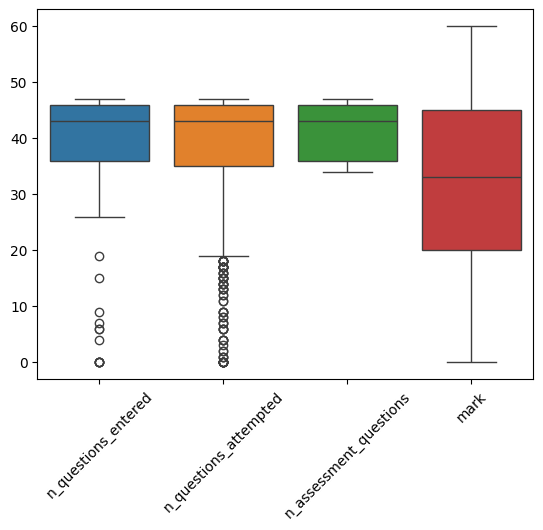

In [13]:
sns.boxplot(data=assessment_df[['n_questions_entered','n_questions_attempted','n_assessment_questions','mark']])
plt.xticks(rotation=45)
plt.show()

#### Homework

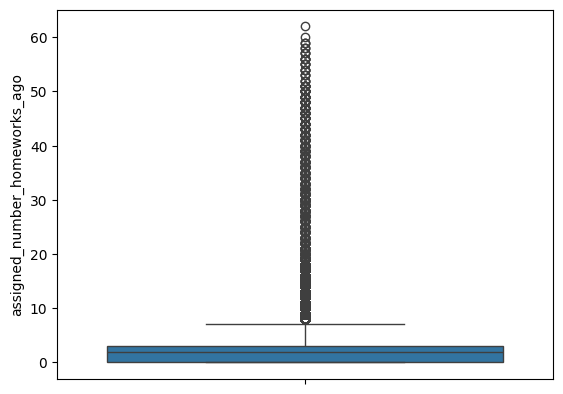

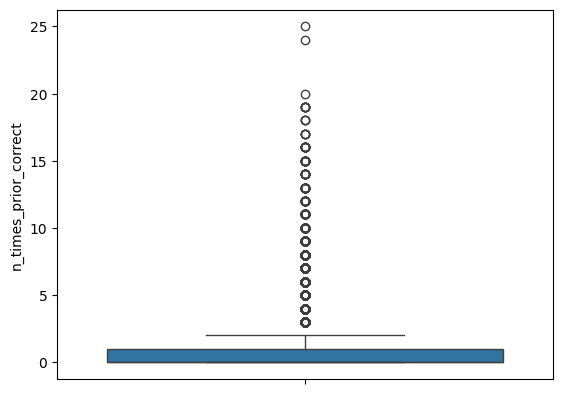

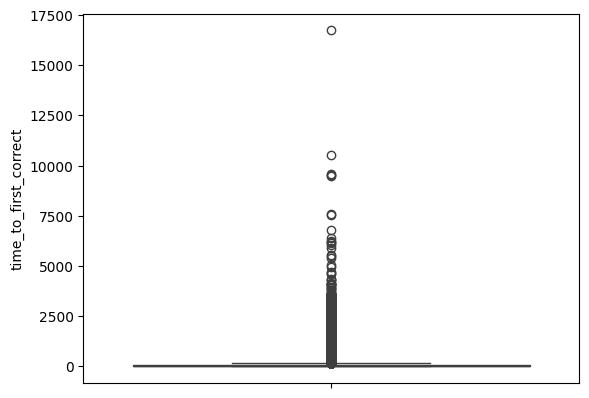

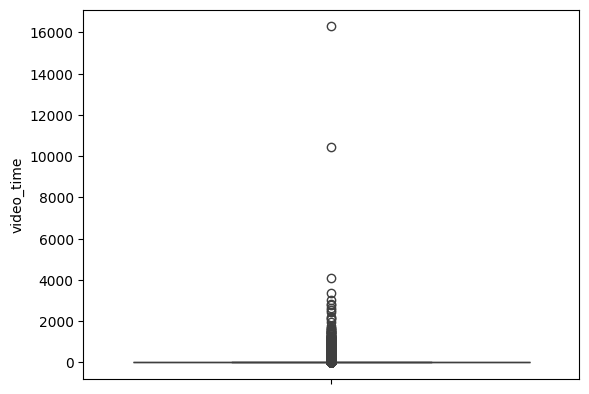

In [14]:
for col in homework_df.loc[:,['assigned_number_homeworks_ago','n_times_prior_correct','time_to_first_correct','video_time']].columns:
    fig, ax = plt.subplots()
    sns.boxplot(data=homework_df,y=col,ax=ax)
    plt.show()

Seems some students took a much longer to answer a question than others but seems this is explained by the longer supporting video time so am not sure these rows should be altered - perhaps a question is to understand why this particular student took such a long time to answer this question.

In [15]:
homework_df[homework_df['time_to_first_correct']>10000]

,student_id,package_id,first_start_time,last_start_time,task_index,task_item_index,assigned_number_homeworks_ago,learning_unit_id,question_id,n_times_prior_correct,summary,time_to_first_correct,video_time
165378,2e69c,0e0d6,2024-10-03 16:03:49.234000+00:00,2024-10-04 15:10:48.735000+00:00,2,3,3,3658e,f49e0,1,VWVWWAVC,10552.340,10458.702
388657,1433e,63ee5,2025-01-11 08:29:26.569000+00:00,2025-01-12 08:28:49.543000+00:00,1,1,0,141bc,6d17e,2,VWVAVWVWVC,16742.181,16295.770


## Question 1

Approach through obtaining the list of unique student ids for each dataset and merge together using pandas DataFrame.

In [16]:
assessment_df_unique_student_ids = pd.DataFrame(assessment_df['student_id'].unique(), columns=['assessment_unique_student_id'])
homework_df_unique_student_ids = pd.DataFrame(homework_df['student_id'].unique(), columns=['homework_unique_student_id'])
print("Number distinct students with both assessment and activity data: " + 
      str(assessment_df_unique_student_ids.merge(homework_df_unique_student_ids, left_on='assessment_unique_student_id',
                                                 right_on='homework_unique_student_id').nunique().iloc[0]))

Number distinct students with both assessment and activity data: 1394


## Question 2

Assuming 'Completed' refers to the students that attempted all questions in the assessment and order tests were taken follows that of 'Created' column.

In [23]:
completed_assessments_df = assessment_df[assessment_df['n_questions_attempted']==assessment_df['n_assessment_questions']]
student_ids_with_two_or_more_completions = (completed_assessments_df.groupby('student_id')['assessment_id'].count()>=2).index
two_or_more_completions_df = assessment_df[assessment_df['student_id'].isin(student_ids_with_two_or_more_completions)].copy(deep=True)
two_or_more_completions_df['mark_diff'] = two_or_more_completions_df.sort_values(by=['created']).groupby('student_id')['mark'].diff()
mean_mark_diff = two_or_more_completions_df.groupby('student_id')['mark_diff'].mean()
display(mean_mark_diff)

student_id
00587   -7.000000
00729   -7.500000
00b29   -1.000000
00b3d   -2.000000
00bfd   -8.500000
           ...   
fe995   -3.000000
fead1   -2.250000
feb72   -2.333333
ff9df   -1.750000
ffc5d    0.200000
Name: mark_diff, Length: 1360, dtype: float64

## Question 3

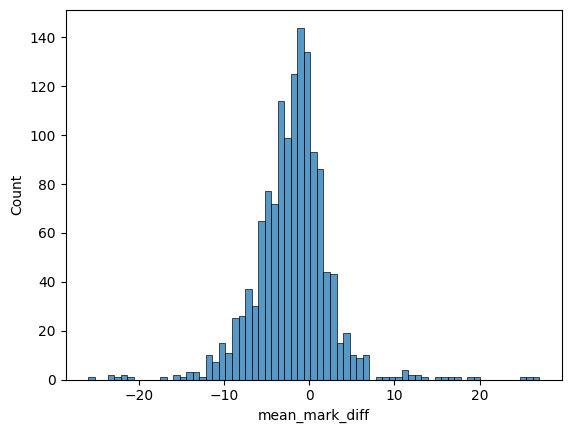

In [26]:
sns.histplot(data=mean_mark_diff)
plt.xlabel('mean_mark_diff')
plt.show()

## Question 4

In [28]:
second_mark_diff_mean = two_or_more_completions_df.sort_values(by=['created']).groupby('student_id').head(2)['mark'].diff().mean()
print(second_mark_diff_mean)

-0.009569377990430622
